In [2]:
from numpy import *
import matplotlib.pyplot as plt
from prody import *

# Configure ProDy
confProDy(auto_show=False)
confProDy(auto_secondary=True)

# Import ion from Matplotlib
from matplotlib.pyplot import ion

# Turn interactive mode on
ion()

@> ProDy is configured: auto_show=False
@> ProDy is configured: auto_secondary=True


# Active 3B3F & Inactive 3B3J GNM analysis

Tip: how to access the documentation

- ProDy website: reference manual
- see docstring of a method (?, ??)
- quick look at the parameter list (shift-Tab)
- jupyter syntax & shortcuts (h)

In [3]:
# Dimer structures
activeDimer = parsePDB('3b3f_AB_Nter_trimmed_noSAH.pdb', compressed=False)
inactiveDimer = parsePDB('3b3j_clean_dimer_Nter_trimmed.pdb', compressed=False)
activeDimer_calphas = activeDimer.select('calpha')
inactiveDimer_calphas = inactiveDimer.select('calpha')

@> 5222 atoms and 1 coordinate set(s) were parsed in 0.38s.
@> 5222 atoms and 1 coordinate set(s) were parsed in 0.35s.


In [4]:
# Monomer structures
activeMonomer = parsePDB('3b3f_A_Nter_trimmed_noSAH.pdb', compressed=False)
inactiveMonomer = parsePDB('3b3j_clean_Nter_trimmed.pdb', compressed=False)
activeMonomer_calphas = activeMonomer.select('calpha')
inactiveMonomer_calphas = inactiveMonomer.select('calpha')

@> 2611 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> 2611 atoms and 1 coordinate set(s) were parsed in 0.26s.


This PDB file contains 2 chains. If we only want to use 
Cα atoms from chain A, then we can select it as:

In [4]:
activeDimer_calphas.numAtoms()

652

In [5]:
inactiveDimer_calphas.numAtoms()

652

In [6]:
activeMonomer_calphas.numAtoms()

326

In [7]:
inactiveMonomer_calphas.numAtoms()

326

## Computing GNM normal modes¶
See also the online tutorial http://prody.csb.pitt.edu/tutorials/enm_analysis/gnm.html.

First, let's instantiate an object of GNM class.

In [5]:
# Dimers GNM
activeDimer_gnm = GNM('Active Dimer') # assign a name 
activeDimer_gnm.buildKirchhoff(activeDimer_calphas)
activeDimer_gnm.getKirchhoff()

inactiveDimer_gnm = GNM('Inactive Dimer')
inactiveDimer_gnm.buildKirchhoff(inactiveDimer_calphas)
inactiveDimer_gnm.getKirchhoff()

@> Kirchhoff was built in 0.15s.
@> Kirchhoff was built in 0.26s.


array([[15., -1., -1., ...,  0.,  0.,  0.],
       [-1., 10., -1., ...,  0.,  0.,  0.],
       [-1., -1., 15., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 12., -1., -1.],
       [ 0.,  0.,  0., ..., -1.,  8., -1.],
       [ 0.,  0.,  0., ..., -1., -1.,  5.]])

In [6]:
# Monomers GNM
activeMonomer_gnm = GNM('Active Monomer') # assign a name 
activeMonomer_gnm.buildKirchhoff(activeMonomer_calphas)
activeMonomer_gnm.getKirchhoff()

inactiveMonomer_gnm = GNM('Inactive Monomer')
inactiveMonomer_gnm.buildKirchhoff(inactiveMonomer_calphas)
inactiveMonomer_gnm.getKirchhoff()

@> Kirchhoff was built in 0.07s.
@> Kirchhoff was built in 0.07s.


array([[14., -1., -1., ..., -1.,  0.,  0.],
       [-1.,  9., -1., ...,  0.,  0.,  0.],
       [-1., -1., 10., ...,  0.,  0.,  0.],
       ...,
       [-1.,  0.,  0., ..., 11., -1., -1.],
       [ 0.,  0.,  0., ..., -1.,  7., -1.],
       [ 0.,  0.,  0., ..., -1., -1.,  5.]])

### Check that every row sum is equal to 0 (since it is a Kirchhoff matrix!):

In [7]:
apply_along_axis(sum, 1, activeDimer_gnm.getKirchhoff())

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
apply_along_axis(sum, 1, inactiveDimer_gnm.getKirchhoff())

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
apply_along_axis(sum, 1, activeMonomer_gnm.getKirchhoff())

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
apply_along_axis(sum, 1, inactiveMonomer_gnm.getKirchhoff())

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Degrees of residues:

In [11]:
diag(activeDimer_gnm.getKirchhoff())

array([10., 16., 17., 16., 23., 18., 12., 18., 17., 11., 17., 19., 15.,
       15., 14., 19., 19., 19., 14., 17., 25., 20., 15., 24., 25., 19.,
       17., 20., 19., 16., 23., 24., 17., 15., 18., 22., 29., 29., 27.,
       27., 28., 27., 30., 27., 25., 25., 24., 31., 25., 22., 29., 23.,
       17., 22., 19., 22., 16., 23., 27., 22., 29., 27., 26., 20., 17.,
       16., 21., 24., 16., 19., 26., 21., 19., 23., 25., 13., 15., 17.,
       12., 16., 15., 11., 19., 26., 18., 23., 21., 21., 16., 15., 23.,
       13.,  9., 13., 12., 13.,  8., 11., 16., 23., 20., 22., 24., 25.,
       22., 21., 19., 20., 16., 22., 23., 22., 23., 17., 18., 22., 20.,
       24., 20., 17., 25., 23., 17., 17., 24., 12., 20., 20., 14., 11.,
        8., 16., 23., 24., 22., 28., 19., 19., 24., 19., 21., 22., 26.,
       21., 25., 23., 23., 17., 13.,  9., 14., 18., 11., 12., 17., 18.,
       12., 16., 22., 17., 17., 22., 19., 14., 13., 11., 15., 15., 14.,
       18., 17., 24., 21., 18., 21., 19., 14., 16., 23., 19., 17

In [12]:
diag(inactiveDimer_gnm.getKirchhoff())

array([15., 10., 15., 14., 13., 14., 12., 10., 11., 13., 13., 12., 13.,
       13., 14., 13., 18., 21., 13., 17., 22., 21., 16., 21., 23., 19.,
       16., 20., 21., 16., 23., 23., 17., 16., 19., 22., 29., 29., 27.,
       23., 25., 19., 17., 19., 26., 21., 23., 28., 24., 23., 30., 24.,
       17., 21., 18., 22., 16., 23., 25., 22., 28., 26., 24., 15., 14.,
       11., 16., 21., 16., 16., 27., 20., 14., 23., 24., 13., 16., 14.,
       10., 16., 14., 11., 19., 26., 19., 22., 21., 19., 17., 16., 25.,
       12.,  6., 11., 13., 13.,  7., 10., 16., 24., 19., 23., 26., 23.,
       21., 22., 20., 18., 12., 14., 17., 19., 17., 19., 20., 15., 18.,
       20., 18., 16., 23., 21., 15., 19., 24., 12., 20., 21., 15., 11.,
        8., 17., 23., 24., 23., 25., 19., 19., 18., 16., 18., 18., 25.,
       23., 25., 23., 24., 16., 12.,  8., 15., 19., 10., 14., 19., 17.,
       12., 17., 20., 16., 10., 19., 20., 14., 13., 11., 15., 15., 12.,
       17., 16., 20., 19., 16., 18., 18., 14., 12., 18., 19., 15

In [13]:
diag(activeMonomer_gnm.getKirchhoff())

array([10., 16., 17., 13., 14., 11., 12., 18., 12., 11., 17., 17., 13.,
       15., 14., 19., 19., 18., 13., 17., 25., 19., 15., 24., 25., 19.,
       17., 20., 19., 16., 23., 24., 17., 15., 18., 22., 29., 29., 27.,
       27., 28., 27., 30., 25., 24., 20., 24., 31., 22., 19., 29., 23.,
       15., 22., 19., 22., 16., 23., 27., 22., 29., 27., 26., 20., 17.,
       16., 21., 24., 16., 15., 24., 21., 15., 17., 21., 12.,  9., 10.,
       11., 16., 15., 11., 19., 26., 18., 23., 21., 21., 16., 15., 23.,
       13.,  9., 13., 12., 13.,  8., 11., 16., 23., 20., 22., 24., 25.,
       22., 21., 19., 20., 16., 22., 23., 22., 23., 17., 18., 22., 20.,
       24., 20., 17., 25., 23., 17., 17., 24., 12., 20., 20., 14., 11.,
        8., 16., 23., 24., 22., 28., 19., 19., 24., 19., 21., 22., 26.,
       21., 25., 23., 23., 17., 13.,  9., 14., 18., 11., 12., 17., 18.,
       12., 14., 19., 17., 14., 20., 19., 14., 12., 11., 12.,  7.,  8.,
        9., 13., 16., 18., 12., 14., 18., 14., 13., 19., 18., 17

In [14]:
diag(inactiveMonomer_gnm.getKirchhoff())

array([14.,  9., 10., 10., 11.,  9., 10.,  8., 11., 13., 11., 11., 13.,
       13., 11., 12., 18., 19., 11., 17., 22., 19., 15., 21., 23., 19.,
       16., 20., 21., 16., 23., 23., 17., 16., 19., 22., 29., 29., 27.,
       23., 25., 19., 17., 19., 26., 18., 23., 28., 21., 20., 30., 24.,
       15., 21., 18., 22., 16., 23., 25., 22., 28., 26., 24., 15., 14.,
       11., 16., 21., 16., 12., 25., 20., 11., 17., 21., 12., 10.,  9.,
       10., 16., 14., 11., 19., 26., 19., 22., 21., 19., 17., 16., 25.,
       12.,  6., 11., 13., 13.,  7., 10., 16., 24., 19., 23., 26., 23.,
       21., 22., 20., 18., 12., 14., 17., 19., 17., 19., 20., 15., 18.,
       20., 18., 16., 23., 21., 15., 19., 24., 12., 20., 21., 15., 11.,
        8., 17., 23., 24., 23., 25., 19., 19., 18., 16., 18., 18., 25.,
       23., 25., 23., 24., 16., 12.,  8., 15., 19., 10., 14., 19., 17.,
       12., 14., 20., 16., 10., 15., 20., 14., 13., 11., 11.,  6.,  7.,
        9., 12., 13., 17., 10., 13., 18., 14., 11., 18., 19., 15

### Calculate normal modes
Note that by default 20 non-zero (or non-trivial) modes and 1 trivial mode are calculated. Trivial modes are not retained. To calculate different numbers of non-zero modes or to keep zero modes, try gnm.calcModes(50, zeros=True).

We can calculate normal modes from the Kirchhoff matrix by the method calcModes. 
Many parameters in this function can be adjusted, e.g. the number of modes: 

calcModes( ) doc /activeDimer_gnm.calcModes?

In [15]:
activeDimer_gnm.calcModes(n_modes=20, zeros=True)

@> 20 modes were calculated in 5.46s.


In [16]:
inactiveDimer_gnm.calcModes(n_modes=20, zeros=True)

@> 20 modes were calculated in 18.90s.


In [17]:
activeMonomer_gnm.calcModes(n_modes=20, zeros=True)

@> 20 modes were calculated in 3.66s.


In [18]:
inactiveMonomer_gnm.calcModes(n_modes=20, zeros=True)

@> 20 modes were calculated in 2.16s.


The algebraic multiplicity of zero eigenvalues determines separate connected components of your graph.

If it is equal to one, then your graph does not have a disconnected piece!

### Normal mode data
Get eigenvalues and eigenvectors:

In [19]:
activeDimer_gnm.getEigvals().round(3)

array([0.   , 0.155, 0.401, 0.65 , 1.62 , 1.693, 2.053, 2.199, 2.403,
       2.441, 2.873, 3.081, 3.355, 3.423, 3.69 , 3.772, 4.194, 4.242,
       4.371, 4.563])

In [20]:
activeDimer_gnm.getEigvecs()

array([[ 0.03916302,  0.03020323, -0.04681742, ...,  0.02563613,
        -0.05642682,  0.02075337],
       [ 0.03916302,  0.03278429, -0.04498016, ...,  0.01453072,
        -0.034263  ,  0.02004475],
       [ 0.03916302,  0.03245156, -0.0457679 , ...,  0.01290578,
        -0.03277493,  0.02093998],
       ...,
       [ 0.03916302, -0.03600286, -0.03726524, ...,  0.07771686,
        -0.04202435, -0.0479579 ],
       [ 0.03916302, -0.037916  , -0.0345073 , ...,  0.06741686,
        -0.04940001, -0.04936105],
       [ 0.03916302, -0.03886443, -0.03567077, ...,  0.28530902,
        -0.22871368, -0.27406792]])

In [21]:
activeDimer_gnm.getEigvecs()[:, 0]

array([0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916

In [22]:
activeDimer_gnm.getVariances()[1:].round(3)

array([6.459, 2.496, 1.539, 0.617, 0.591, 0.487, 0.455, 0.416, 0.41 ,
       0.348, 0.325, 0.298, 0.292, 0.271, 0.265, 0.238, 0.236, 0.229,
       0.219])

In [23]:
inactiveDimer_gnm.getEigvals().round(3)

array([-0.   ,  0.144,  0.368,  0.547,  1.355,  1.473,  1.523,  1.594,
        1.784,  2.076,  2.195,  2.423,  2.597,  2.652,  2.948,  2.979,
        3.289,  3.32 ,  3.687,  3.789])

In [24]:
inactiveDimer_gnm.getEigvecs()

array([[ 0.03916302, -0.02153303,  0.02374273, ...,  0.00858598,
        -0.03964033,  0.03383596],
       [ 0.03916302, -0.01801827,  0.01733698, ...,  0.00255153,
        -0.05976068,  0.04292516],
       [ 0.03916302, -0.00641843,  0.00146087, ..., -0.01560137,
        -0.04138199,  0.01480903],
       ...,
       [ 0.03916302,  0.0251076 , -0.03534607, ...,  0.02089187,
        -0.01916438, -0.04291367],
       [ 0.03916302,  0.0245552 , -0.03410081, ...,  0.03772628,
        -0.01528374, -0.06242358],
       [ 0.03916302,  0.0281565 , -0.03691297, ...,  0.07901662,
        -0.01688006, -0.13598196]])

In [25]:
inactiveDimer_gnm.getEigvecs()[:, 0]

array([0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916302,
       0.03916302, 0.03916302, 0.03916302, 0.03916302, 0.03916

In [26]:
inactiveDimer_gnm.getVariances()[1:].round(3)

array([6.941, 2.715, 1.827, 0.738, 0.679, 0.657, 0.628, 0.561, 0.482,
       0.456, 0.413, 0.385, 0.377, 0.339, 0.336, 0.304, 0.301, 0.271,
       0.264])

In [27]:
activeMonomer_gnm.getEigvals().round(3)

array([0.   , 0.35 , 0.752, 1.839, 2.202, 2.366, 2.924, 3.226, 3.37 ,
       3.941, 4.416, 4.766, 4.929, 5.285, 5.481, 5.708, 6.082, 6.203,
       6.488, 6.98 ])

In [28]:
activeMonomer_gnm.getEigvecs()

array([[ 0.05538488,  0.06354098, -0.03424544, ...,  0.00667329,
        -0.06947781, -0.06504895],
       [ 0.05538488,  0.06252368, -0.03300763, ...,  0.01078965,
        -0.05154862,  0.00079404],
       [ 0.05538488,  0.06331126, -0.03391119, ...,  0.00986915,
        -0.0523786 ,  0.00752448],
       ...,
       [ 0.05538488, -0.03578995,  0.03539923, ...,  0.11571444,
         0.03772664, -0.02924761],
       [ 0.05538488, -0.02909586,  0.03913667, ...,  0.10437633,
         0.02135252, -0.03551843],
       [ 0.05538488, -0.03120357,  0.04365098, ..., -0.39768797,
        -0.07982703,  0.06455508]])

In [29]:
activeMonomer_gnm.getEigvecs()[:, 0]

array([0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538

In [30]:
activeMonomer_gnm.getVariances()[1:].round(3)

array([2.854, 1.33 , 0.544, 0.454, 0.423, 0.342, 0.31 , 0.297, 0.254,
       0.226, 0.21 , 0.203, 0.189, 0.182, 0.175, 0.164, 0.161, 0.154,
       0.143])

In [31]:
inactiveMonomer_gnm.getEigvals().round(3)

array([-0.   ,  0.31 ,  0.689,  1.073,  1.541,  1.866,  2.234,  2.588,
        2.909,  3.087,  3.665,  4.061,  4.221,  4.576,  4.903,  5.004,
        5.24 ,  5.474,  5.78 ,  5.967])

In [32]:
inactiveMonomer_gnm.getEigvecs()

array([[ 0.05538488, -0.02374664,  0.04088116, ..., -0.01667452,
        -0.03929207, -0.04975296],
       [ 0.05538488, -0.01828824,  0.04088056, ..., -0.03360485,
        -0.0413218 , -0.06027232],
       [ 0.05538488, -0.006993  ,  0.03864569, ..., -0.01133896,
         0.00424585, -0.00939732],
       ...,
       [ 0.05538488, -0.03419901,  0.04428738, ..., -0.00936146,
        -0.02094117, -0.0400341 ],
       [ 0.05538488, -0.03171363,  0.05129335, ..., -0.00432794,
        -0.01193064, -0.04981869],
       [ 0.05538488, -0.03259858,  0.05489585, ...,  0.01917479,
         0.22956706,  0.18773379]])

In [33]:
inactiveMonomer_gnm.getEigvecs()[:, 0]

array([0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538488,
       0.05538488, 0.05538488, 0.05538488, 0.05538488, 0.05538

In [34]:
inactiveMonomer_gnm.getVariances()[1:].round(3)

array([3.222, 1.452, 0.932, 0.649, 0.536, 0.448, 0.386, 0.344, 0.324,
       0.273, 0.246, 0.237, 0.219, 0.204, 0.2  , 0.191, 0.183, 0.173,
       0.168])

NB: A more compact way to compute GNM is to use the function calcGNM( ) doc

## How to plot results¶


In [35]:
activeDimer_gnm.calcModes()

@> 20 modes were calculated in 11.89s.


In [36]:
inactiveDimer_gnm.calcModes()

@> 20 modes were calculated in 11.62s.


In [37]:
activeMonomer_gnm.calcModes()

@> 20 modes were calculated in 4.25s.


In [38]:
inactiveMonomer_gnm.calcModes()

@> 20 modes were calculated in 4.81s.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


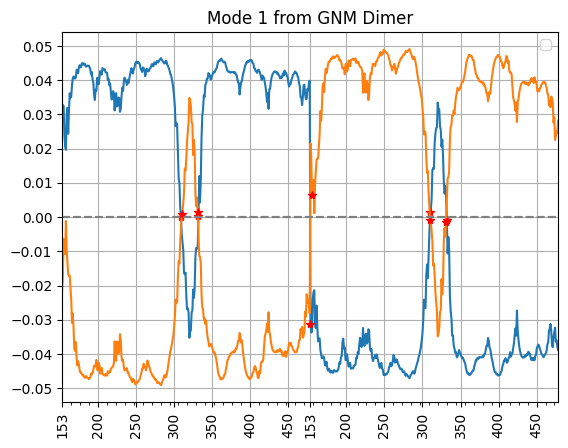

In [39]:
import numpy as np
# Assuming activeDimer_calphas, activeDimer_gnm, and inactiveDimer_gnm are already defined
# Calculate and show modes and hinges
resnum_activeDimer = activeDimer_calphas.getResnums()

# Define tick indices and labels
tick_indices = []
labels = []

# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Show the plot
showMode(activeDimer_gnm[0], hinges=True)
calcHinges(activeDimer_gnm[0])

showMode(inactiveDimer_gnm[0], hinges=True)
calcHinges(inactiveDimer_gnm[0])

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.01
y_ticks = np.arange(-0.05, plt.ylim()[1], 0.01)
plt.yticks(y_ticks)
plt.title('Mode 1 from GNM Dimer')
# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


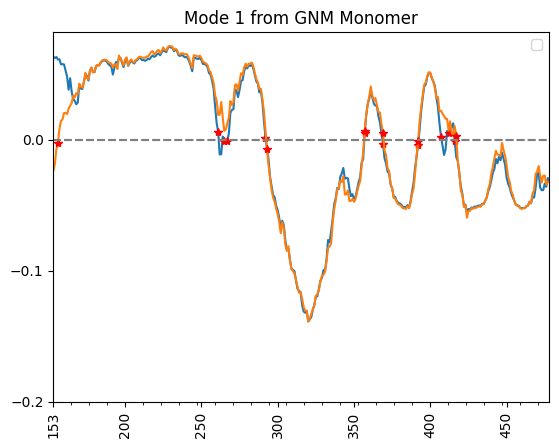

In [40]:
import numpy as np
#... while the shape of normal modes can be visualized by typing:
#We can show possible hinge sites on that plot as well.
resnum_activeMonomer = activeMonomer_calphas.getResnums()
showMode(activeMonomer_gnm[0], hinges=True);
calcHinges(activeMonomer_gnm[0])

showMode(inactiveMonomer_gnm[0], hinges=True);
calcHinges(inactiveMonomer_gnm[0])

# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.01
y_ticks = np.arange(-0.2, plt.ylim()[1], 0.1)
plt.yticks(y_ticks)
plt.title('Mode 1 from GNM Monomer')

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

In [41]:
#Furthermore, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:
hinge_indices = calcHinges(activeDimer_gnm[0])
# Renumbering the hinge indices
renumbered_hinges_activeDimer = [resnum_activeDimer[i] for i in hinge_indices]

# Output the renumbered hinges
print(renumbered_hinges_activeDimer)
#Many other visualization tools can be found online at the page Plotting Functions.


[309, 332, 153, 310, 332]


In [42]:
#Furthermore, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:
hinge_indices = calcHinges(activeDimer_gnm[1])
# Renumbering the hinge indices
renumbered_hinges_activeDimer = [resnum_activeDimer[i] for i in hinge_indices]

# Output the renumbered hinges
print(renumbered_hinges_activeDimer)
#Many other visualization tools can be found online at the page Plotting Functions.


[260, 269, 291, 358, 366, 394, 406, 260, 269, 291, 358, 366, 394, 406, 415]


In [43]:
#Furthermore, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:
hinge_indices = calcHinges(activeDimer_gnm[2])
# Renumbering the hinge indices
renumbered_hinges_activeDimer = [resnum_activeDimer[i] for i in hinge_indices]

# Output the renumbered hinges
print(renumbered_hinges_activeDimer)
#Many other visualization tools can be found online at the page Plotting Functions.


[260, 268, 291, 310, 332, 358, 367, 393, 406, 153, 260, 268, 291, 311, 332, 358, 367, 394, 406]


In [44]:
#Furthermore, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:
hinge_indices = calcHinges(activeDimer_gnm[:3])
# Renumbering the hinge indices
renumbered_hinges_activeDimer = [resnum_activeDimer[i] for i in hinge_indices]

# Output the renumbered hinges
print(renumbered_hinges_activeDimer)
#Many other visualization tools can be found online at the page Plotting Functions.


[260, 268, 269, 291, 309, 310, 332, 358, 366, 367, 393, 394, 406, 153, 260, 268, 269, 291, 310, 311, 332, 358, 366, 367, 394, 406, 415]


In [45]:
#Furthermore, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:
hinge_indices_inactive = calcHinges(inactiveDimer_gnm[0])
# Renumbering the hinge indices
renumbered_hinges_inactiveDimer = [resnum_activeDimer[i] for i in hinge_indices_inactive]

# Output the renumbered hinges
print(renumbered_hinges_inactiveDimer)
#Many other visualization tools can be found online at the page Plotting Functions.


[310, 331, 155, 310, 331]


In [46]:
#Furthermore, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:
hinge_indices_inactive = calcHinges(inactiveDimer_gnm[1])
# Renumbering the hinge indices
renumbered_hinges_inactiveDimer = [resnum_activeDimer[i] for i in hinge_indices_inactive]

# Output the renumbered hinges
print(renumbered_hinges_inactiveDimer)
#Many other visualization tools can be found online at the page Plotting Functions.


[156, 264, 268, 291, 358, 366, 393, 408, 155, 156, 264, 268, 291, 358, 366, 393, 408]


In [47]:
#Furthermore, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:
hinge_indices_inactive = calcHinges(inactiveDimer_gnm[2])
# Renumbering the hinge indices
renumbered_hinges_inactiveDimer = [resnum_activeDimer[i] for i in hinge_indices_inactive]

# Output the renumbered hinges
print(renumbered_hinges_inactiveDimer)
#Many other visualization tools can be found online at the page Plotting Functions.


[163, 266, 292, 313, 328, 357, 368, 393, 411, 163, 266, 292, 313, 328, 357, 368, 393, 411]


In [48]:
#Furthermore, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:
hinge_indices_inactive = calcHinges(inactiveDimer_gnm[:3])
# Renumbering the hinge indices
renumbered_hinges_inactiveDimer = [resnum_activeDimer[i] for i in hinge_indices_inactive]

# Output the renumbered hinges
print(renumbered_hinges_inactiveDimer)
#Many other visualization tools can be found online at the page Plotting Functions.


[156, 163, 264, 266, 268, 291, 292, 310, 313, 328, 331, 357, 358, 366, 368, 393, 408, 411, 155, 156, 163, 264, 266, 268, 291, 292, 310, 313, 328, 331, 357, 358, 366, 368, 393, 408, 411]


Many other visualization tools can be found online at the page Plotting Functions http://prody.csb.pitt.edu/manual/reference/dynamics/plotting.html? .

GNM covariance and (normalized/orientational) cross-correlation matrices
Let's get the covariance matrix first,  
\[ C_{ij} \propto \sum_{i=1}^{N-1} \lambda_i^{-1} \mathbf{u}_i \mathbf{u}_i^T \] :

In [49]:
activeDimer_cov = activeDimer_gnm.getCovariance()
activeDimer_cov.shape

(652, 652)

In [50]:
activeDimer_cov

array([[ 0.03174183,  0.02733344,  0.02709204, ..., -0.00475885,
        -0.00585061, -0.00673764],
       [ 0.02733344,  0.0244788 ,  0.02433987, ..., -0.00568927,
        -0.00654704, -0.00716861],
       [ 0.02709204,  0.02433987,  0.02423933, ..., -0.00559622,
        -0.00643527, -0.00701582],
       ...,
       [-0.00475885, -0.00568927, -0.00559622, ...,  0.03704244,
         0.03948402,  0.07415522],
       [-0.00585061, -0.00654704, -0.00643527, ...,  0.03948402,
         0.04279492,  0.08104061],
       [-0.00673764, -0.00716861, -0.00701582, ...,  0.07415522,
         0.08104061,  0.19240519]])

In [51]:
inactiveDimer_cov = inactiveDimer_gnm.getCovariance()
inactiveDimer_cov.shape

(652, 652)

In [52]:
inactiveDimer_cov

array([[ 1.85811217e-02,  1.88715868e-02,  1.41129524e-02, ...,
        -7.80245747e-04, -1.01313554e-04, -2.13527916e-03],
       [ 1.88715868e-02,  2.03559634e-02,  1.68847663e-02, ...,
         1.80017475e-03,  2.79372149e-03,  3.66260466e-04],
       [ 1.41129524e-02,  1.68847663e-02,  1.77543490e-02, ...,
         8.50035559e-03,  1.05857311e-02,  1.01776856e-02],
       ...,
       [-7.80245747e-04,  1.80017475e-03,  8.50035559e-03, ...,
         3.29504151e-02,  4.13134278e-02,  6.02868772e-02],
       [-1.01313554e-04,  2.79372149e-03,  1.05857311e-02, ...,
         4.13134278e-02,  5.38187049e-02,  8.16138651e-02],
       [-2.13527916e-03,  3.66260466e-04,  1.01776856e-02, ...,
         6.02868772e-02,  8.16138651e-02,  1.31645007e-01]])

In [53]:
activeMonomer_cov = activeMonomer_gnm.getCovariance()
activeMonomer_cov.shape

(326, 326)

In [54]:
activeMonomer_cov

array([[ 0.05484064,  0.03880708,  0.03862573, ..., -0.00682637,
        -0.0058955 , -0.00909505],
       [ 0.03880708,  0.03006019,  0.03008373, ..., -0.00763984,
        -0.00677357, -0.00802949],
       [ 0.03862573,  0.03008373,  0.03017365, ..., -0.00777519,
        -0.00690382, -0.00806015],
       ...,
       [-0.00682637, -0.00763984, -0.00777519, ...,  0.03276275,
         0.03171206,  0.05527012],
       [-0.0058955 , -0.00677357, -0.00690382, ...,  0.03171206,
         0.03185903,  0.05671257],
       [-0.00909505, -0.00802949, -0.00806015, ...,  0.05527012,
         0.05671257,  0.21810458]])

In [55]:
inactiveMonomer_cov = inactiveMonomer_gnm.getCovariance()
inactiveMonomer_cov.shape

(326, 326)

In [56]:
inactiveMonomer_cov

array([[0.02968884, 0.03860666, 0.03550842, ..., 0.02496631, 0.02797425,
        0.01862418],
       [0.03860666, 0.05443912, 0.05116683, ..., 0.02523353, 0.02469404,
        0.00319808],
       [0.03550842, 0.05116683, 0.05657083, ..., 0.02003728, 0.01924025,
        0.00466279],
       ...,
       [0.02496631, 0.02523353, 0.02003728, ..., 0.03695208, 0.05080123,
        0.06579572],
       [0.02797425, 0.02469404, 0.01924025, ..., 0.05080123, 0.0755722 ,
        0.10953502],
       [0.01862418, 0.00319808, 0.00466279, ..., 0.06579572, 0.10953502,
        0.20567526]])

We can visualize the normalized/orientational cross-correlations between residue fluctuations with the command:

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


([<matplotlib.axis.YTick at 0x7ff62e2de960>,
 [Text(0, 0, '153'),
  Text(0, 47, '200'),
  Text(0, 97, '250'),
  Text(0, 147, '300'),
  Text(0, 197, '350'),
  Text(0, 247, '400'),
  Text(0, 297, '450'),
  Text(0, 326, '153'),
  Text(0, 373, '200'),
  Text(0, 423, '250'),
  Text(0, 473, '300'),
  Text(0, 523, '350'),
  Text(0, 573, '400'),
  Text(0, 623, '450')])

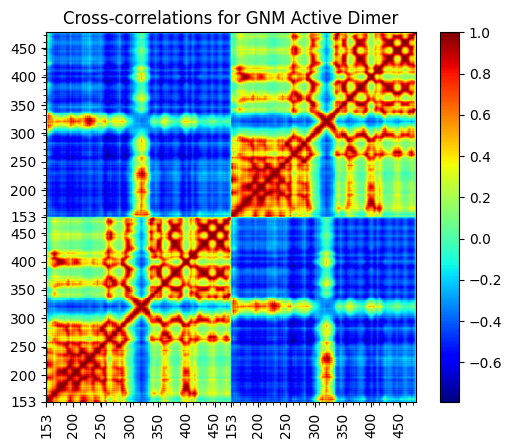

In [57]:
# We can visualize the normalized/orientational cross-correlations between residue fluctuations with the command:
#figure(dpi=100)
showCrossCorr(activeDimer_gnm);
# Add legend
plt.legend

resnum_activeDimer = activeDimer_calphas.getResnums()

# Define tick indices and labels
tick_indices = []
labels = []

# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.yticks(ticks=tick_indices, labels=labels)


@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


([<matplotlib.axis.YTick at 0x7ff628392ba0>,
 [Text(0, 0, '153'),
  Text(0, 47, '200'),
  Text(0, 97, '250'),
  Text(0, 147, '300'),
  Text(0, 197, '350'),
  Text(0, 247, '400'),
  Text(0, 297, '450'),
  Text(0, 326, '153'),
  Text(0, 373, '200'),
  Text(0, 423, '250'),
  Text(0, 473, '300'),
  Text(0, 523, '350'),
  Text(0, 573, '400'),
  Text(0, 623, '450')])

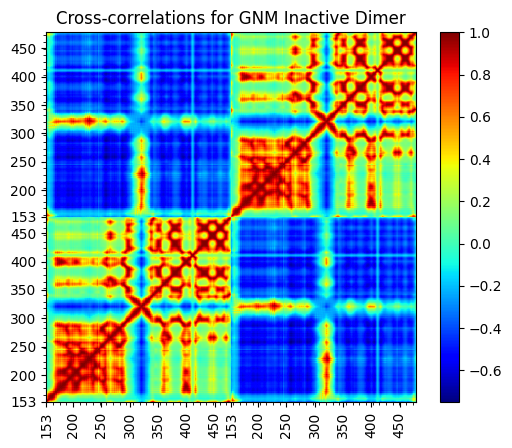

In [58]:
# We can visualize the normalized/orientational cross-correlations between residue fluctuations with the command:
#figure(dpi=100)
showCrossCorr(inactiveDimer_gnm);
plt.legend

resnum_activeDimer = activeDimer_calphas.getResnums()

# Define tick indices and labels
tick_indices = []
labels = []

# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.yticks(ticks=tick_indices, labels=labels)


@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


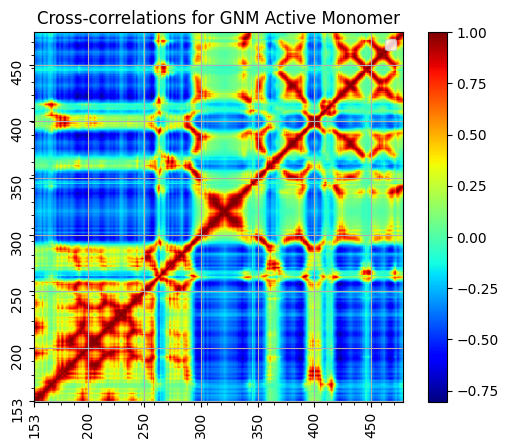

In [59]:
# We can visualize the normalized/orientational cross-correlations between residue fluctuations with the command:
#figure(dpi=100)
showCrossCorr(activeMonomer_gnm);
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)
plt.yticks(ticks=ticks_indices, labels=labels, rotation=90)


# Add grid and legend
plt.grid()
plt.legend()

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


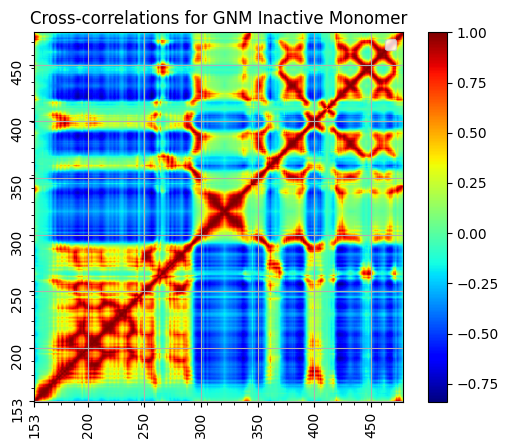

In [60]:
# We can visualize the normalized/orientational cross-correlations between residue fluctuations with the command:
#figure(dpi=100)
showCrossCorr(inactiveMonomer_gnm);
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)
plt.yticks(ticks=ticks_indices, labels=labels, rotation=90)


# Add grid and legend
plt.grid()
plt.legend()

The residues' mean square fluctuations (MSF) are found on the diagonal of the covariance matrix and describe the residue mobility or flexibility.

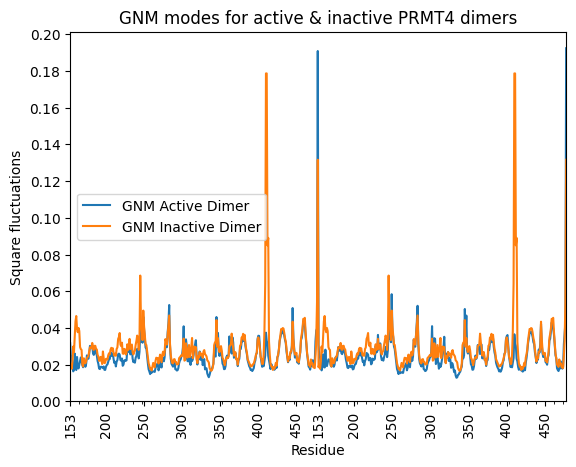

In [61]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 20.

showSqFlucts(activeDimer_gnm,inactiveDimer_gnm);

# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []
# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.title('GNM modes for active & inactive PRMT4 dimers')
# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

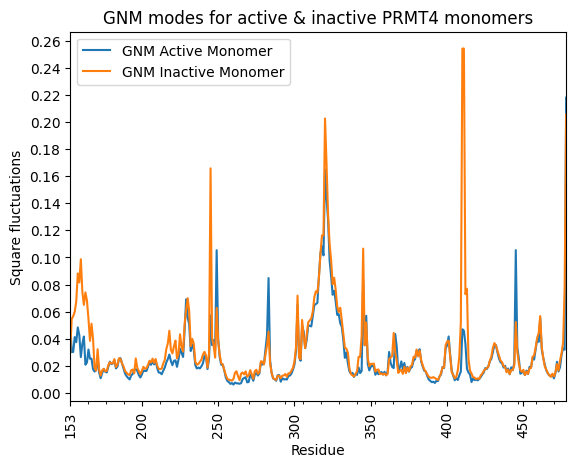

In [62]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 20.

showSqFlucts(activeMonomer_gnm,inactiveMonomer_gnm);
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)
plt.title('GNM modes for active & inactive PRMT4 monomers')
# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

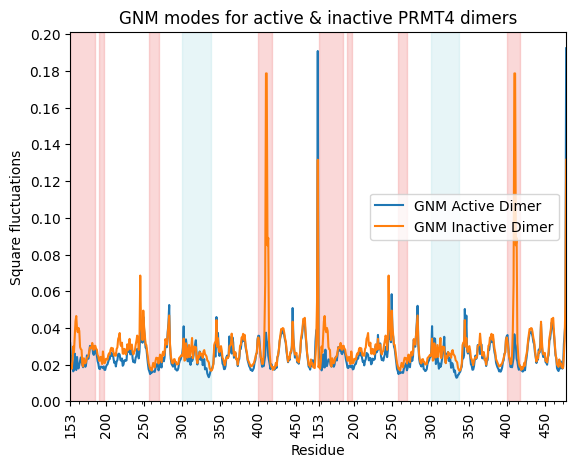

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Show MSFs from the computed modes
showSqFlucts(activeDimer_gnm, inactiveDimer_gnm)

# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []

# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Add highlights to the plot for the specified regions
for start, end, color, label in highlighted_regions:
    plt.axvspan(xmin=start - 153, xmax=end - 153, color=color, alpha=0.3)
    plt.axvspan(xmin=(start - 153) + (chain2_start_index - chain1_indices[0]), 
                xmax=(end - 153) + (chain2_start_index - chain1_indices[0]), 
                color=color, alpha=0.3)

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.title('GNM modes for active & inactive PRMT4 dimers')

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
#plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Moreover, you can specify the number of modes to compute the MSFs to see either their indivudual or cumulative contributions visually as well!

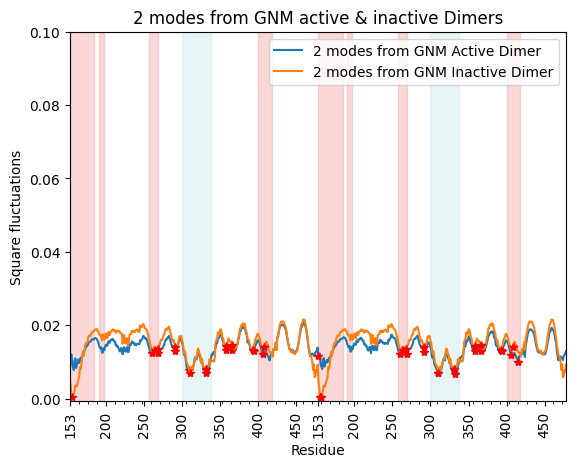

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Show MSFs from the computed modes (first 2 modes) with hinges highlighted
showSqFlucts(activeDimer_gnm[:2], inactiveDimer_gnm[:2], hinges=True)

# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []

# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Add highlights to the plot for the specified regions
for start, end, color, label in highlighted_regions:
    plt.axvspan(xmin=start - 153, xmax=end - 153, color=color, alpha=0.3)
    plt.axvspan(xmin=(start - 153) + (chain2_start_index - chain1_indices[0]), 
                xmax=(end - 153) + (chain2_start_index - chain1_indices[0]), 
                color=color, alpha=0.3)

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.title('2 modes from GNM active & inactive Dimers')

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, 0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
#plt.grid(True)
plt.legend()

# Show the plot
plt.show()

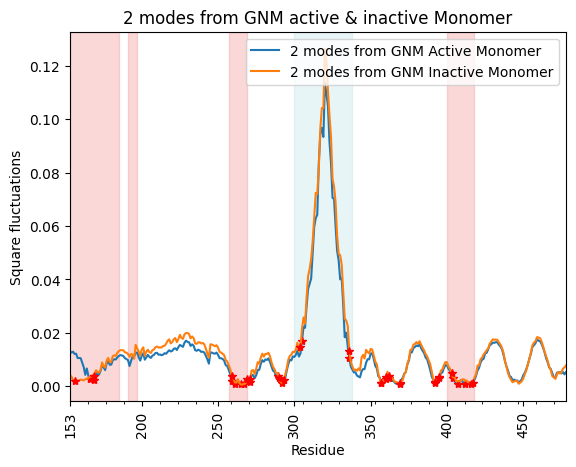

In [69]:

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Square fluctuations computed from 2 slowest (lowest-energy) modes
showSqFlucts(activeMonomer_gnm[:2], hinges=True)
showSqFlucts(inactiveMonomer_gnm[:2], hinges=True)

# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Add highlights to the plot for the specified regions
for start, end, color, label in highlighted_regions:
    # Convert residue numbers to plot indices
    xmin = np.where(resnum_activeMonomer == start)[0][0]
    xmax = np.where(resnum_activeMonomer == end)[0][0]
    plt.axvspan(xmin, xmax, color=color, alpha=0.3)

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)
plt.title('2 modes from GNM active & inactive Monomer')

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
# plt.grid(True)
plt.legend()

# Show the plot
plt.show()

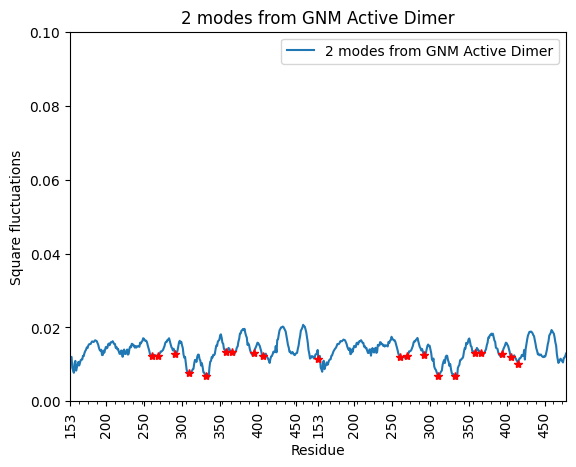

In [70]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 2.

showSqFlucts(activeDimer_gnm[:2], hinges=True);
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []
# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0,0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

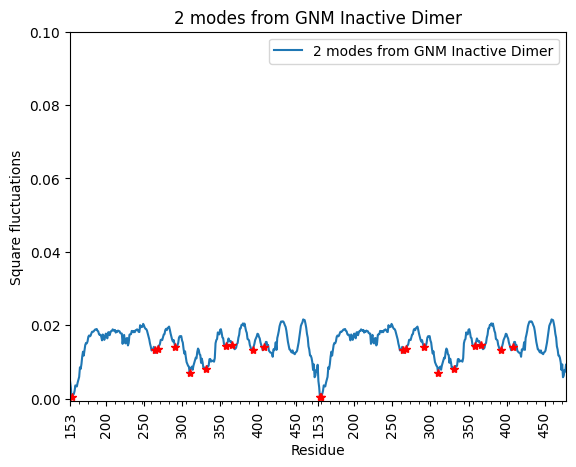

In [71]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 2.

showSqFlucts(inactiveDimer_gnm[:2], hinges=True);
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []
# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0,0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

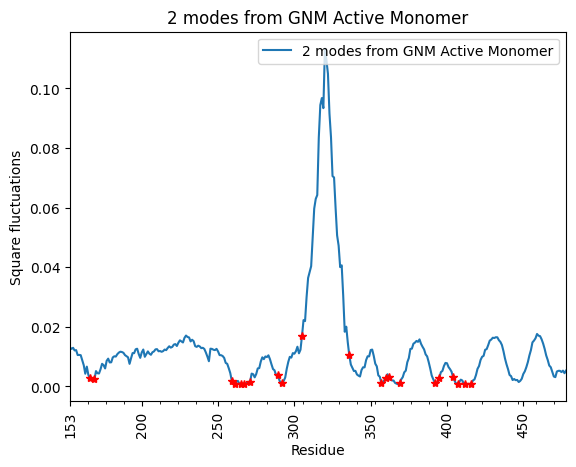

In [72]:
# square fluctuations computed from 2 slowest (lowest-energy) modes
showSqFlucts(activeMonomer_gnm[:2], hinges=True)
#showSqFlucts(inactiveMonomer_gnm[:2], hinges=True)
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

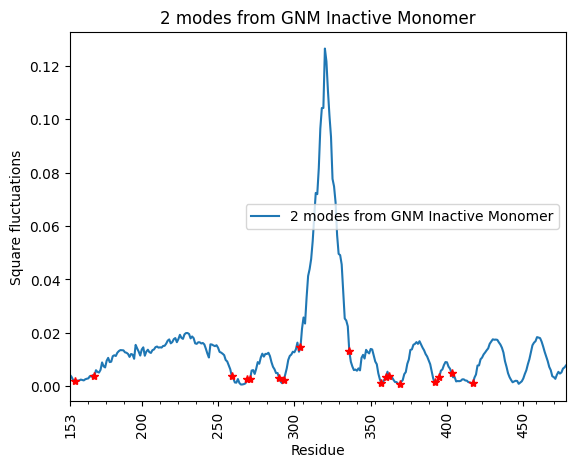

In [73]:
# square fluctuations computed from 2 slowest (lowest-energy) modes
#showSqFlucts(activeMonomer_gnm[:2], hinges=True)
showSqFlucts(inactiveMonomer_gnm[:2], hinges=True)
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

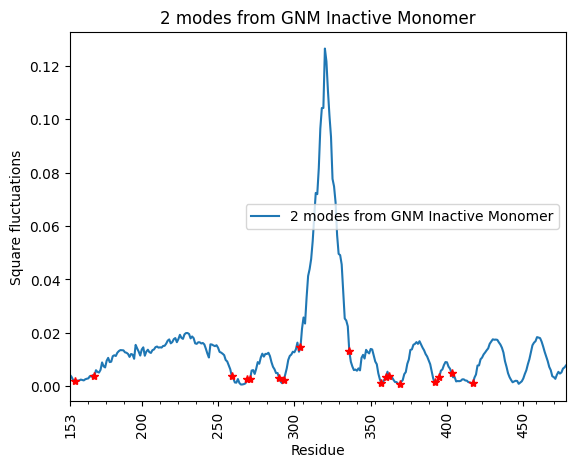

In [74]:
# square fluctuations computed from 2 slowest (lowest-energy) modes
#showSqFlucts(activeMonomer_gnm[:2], hinges=True)
showSqFlucts(inactiveMonomer_gnm[:2], hinges=True)
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

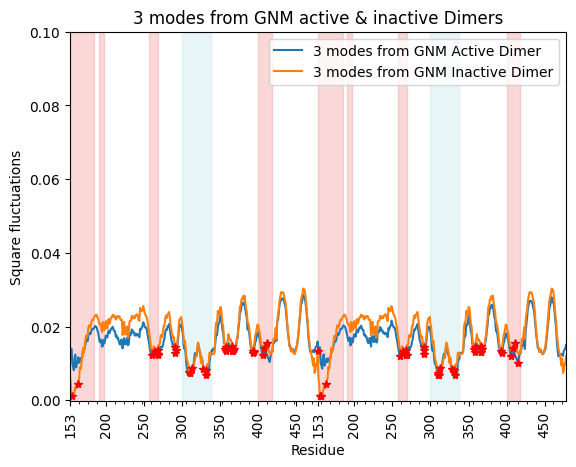

In [68]:

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Show MSFs from the computed modes (first 3 modes) with hinges highlighted
showSqFlucts(activeDimer_gnm[:3], inactiveDimer_gnm[:3], hinges=True)

# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []

# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Add highlights to the plot for the specified regions
for start, end, color, label in highlighted_regions:
    plt.axvspan(xmin=start - 153, xmax=end - 153, color=color, alpha=0.3)
    plt.axvspan(xmin=(start - 153) + (chain2_start_index - chain1_indices[0]), 
                xmax=(end - 153) + (chain2_start_index - chain1_indices[0]), 
                color=color, alpha=0.3)

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.title('3 modes from GNM active & inactive Dimers')

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, 0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
#plt.grid(True)
plt.legend()

# Show the plot
plt.show()

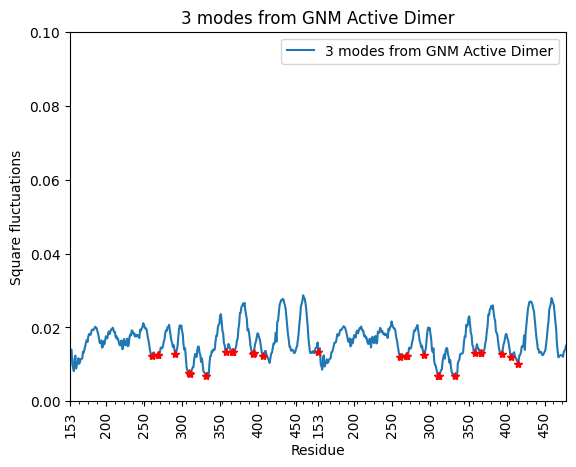

In [76]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 3.

showSqFlucts(activeDimer_gnm[:3], hinges=True);
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []
# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0,0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

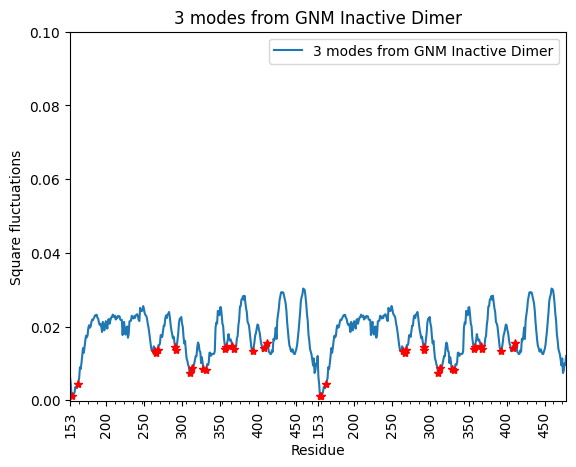

In [77]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 3.

showSqFlucts(inactiveDimer_gnm[:3], hinges=True);
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []
# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0,0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

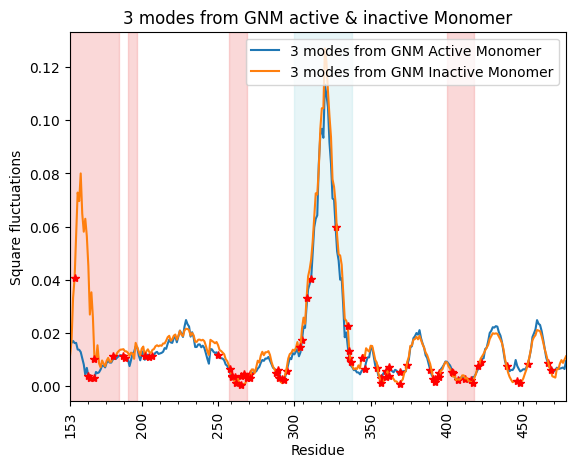

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Square fluctuations computed from 3 slowest (lowest-energy) modes
showSqFlucts(activeMonomer_gnm[:3], hinges=True)
showSqFlucts(inactiveMonomer_gnm[:3], hinges=True)

# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 153, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Add highlights to the plot for the specified regions
for start, end, color, label in highlighted_regions:
    # Convert residue numbers to plot indices
    xmin = np.where(resnum_activeMonomer == start)[0][0]
    xmax = np.where(resnum_activeMonomer == end)[0][0]
    plt.axvspan(xmin, xmax, color=color, alpha=0.3)

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)
plt.title('3 modes from GNM active & inactive Monomer')

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
#plt.grid(True)
plt.legend()

# Show the plot
plt.show()

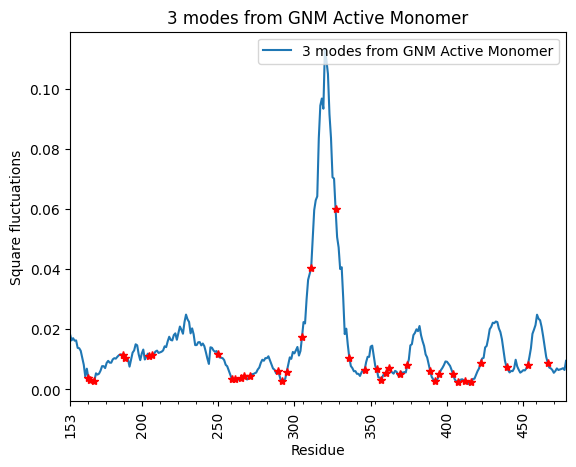

In [79]:
# square fluctuations computed from 3 slowest (lowest-energy) modes
showSqFlucts(activeMonomer_gnm[:3], hinges=True)
#showSqFlucts(inactiveMonomer_gnm[:3], hinges=True)
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

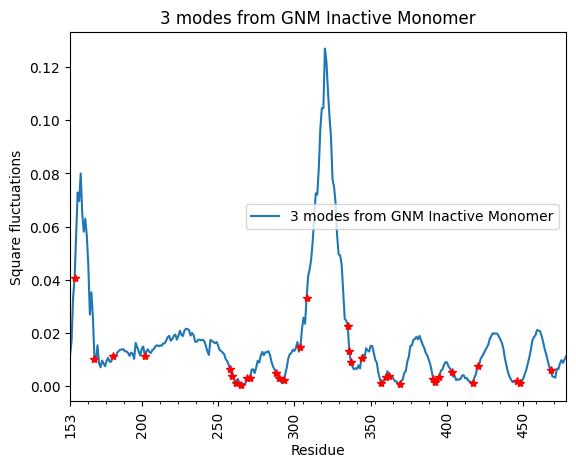

In [80]:
# square fluctuations computed from 3 slowest (lowest-energy) modes
#showSqFlucts(activeMonomer_gnm[:3], hinges=True)
showSqFlucts(inactiveMonomer_gnm[:3], hinges=True)
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Create the list of ticks starting from 147, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_activeMonomer[-1], interval_ticks))
ticks_indices = [np.where(resnum_activeMonomer == tick)[0][0] for tick in ticks if tick in resnum_activeMonomer]
labels = [resnum_activeMonomer[i] for i in ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

# Merge

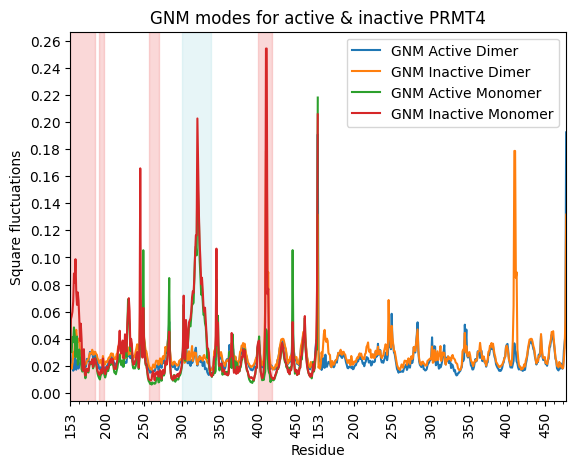

In [74]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 20.
# Add highlights to the plot for the specified regions

showSqFlucts(activeDimer_gnm,inactiveDimer_gnm);
showSqFlucts(activeMonomer_gnm,inactiveMonomer_gnm);

# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define tick indices and labels
tick_indices = []
labels = []
# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))


# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.title('GNM modes for active & inactive PRMT4')
# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, plt.ylim()[1], 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

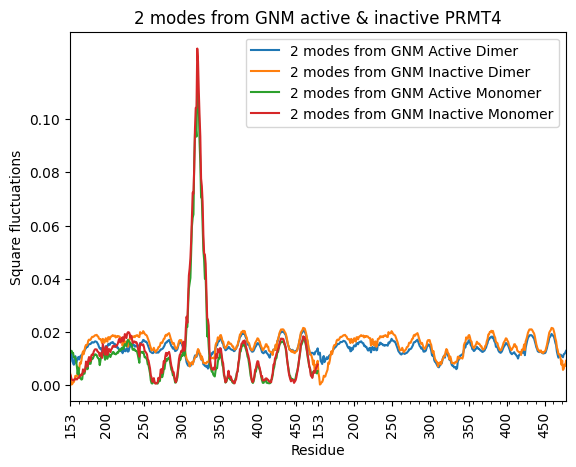

In [82]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 2.

showSqFlucts(activeDimer_gnm[:2],inactiveDimer_gnm[:2], hinges=False);
showSqFlucts(activeMonomer_gnm[:2],inactiveMonomer_gnm[:2], hinges=False);
# Define the starting points and interval for ticks
initial_ticks = [153, 200]
interval_ticks = 50

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]
# Define tick indices and labels
tick_indices = []
labels = []
# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_activeDimer == 153)[0][0], np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.title('2 modes from GNM active & inactive PRMT4')
# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0,0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

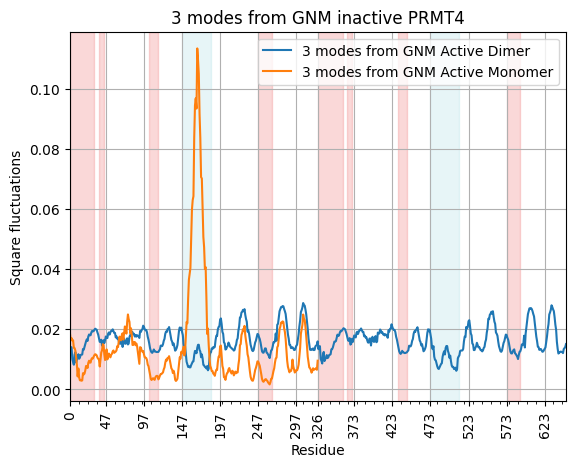

In [83]:
# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'Motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Plot the fluctuation data
showSqFlucts(activeDimer_gnm[:3], activeMonomer_gnm[:3])

# Chain 1 (153 to 478)
chain1_start_index = np.where(resnum_activeDimer == 153)[0][0]
chain1_indices = list(range(chain1_start_index, np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]

# Add x-axis ticks and labels for Chain 1 and Chain 2
tick_indices = [chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50] + [chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50]
labels = [chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]) + [chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50])

# Track labels that have been added to the legend to avoid duplicates
added_labels = []

# Apply highlights for both Chain 1 and Chain 2
for start, end, color, label in highlighted_regions:
    # Convert residue numbers to plot indices for Chain 1
    xmin_chain1 = np.where(resnum_activeDimer == start)[0][0]
    xmax_chain1 = np.where(resnum_activeDimer == end)[0][0]
    
    # Add the highlight for Chain 1
    if label not in added_labels:
        plt.axvspan(xmin_chain1, xmax_chain1, color=color, alpha=0.3)
        added_labels.append(label)
    else:
        plt.axvspan(xmin_chain1, xmax_chain1, color=color, alpha=0.3)

    # Convert residue numbers to plot indices for Chain 2
    xmin_chain2 = np.where(resnum_activeDimer == start)[0][1]
    xmax_chain2 = np.where(resnum_activeDimer == end)[0][1]
    
    # Add the highlight for Chain 2
    plt.axvspan(xmin_chain2, xmax_chain2, color=color, alpha=0.3)

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, rotation=90)
plt.title('3 modes from GNM inactive PRMT4')

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, 0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

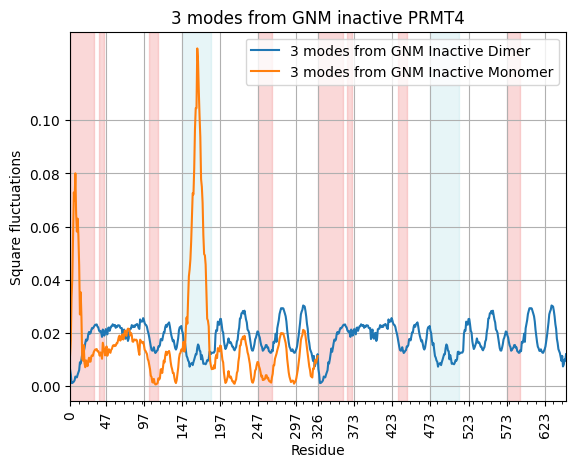

In [81]:
# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'Motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Plot the fluctuation data
showSqFlucts(inactiveDimer_gnm[:3], inactiveMonomer_gnm[:3])

# Chain 1 (153 to 478)
chain1_start_index = np.where(resnum_activeDimer == 153)[0][0]
chain1_indices = list(range(chain1_start_index, np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]

# Add x-axis ticks and labels for Chain 1 and Chain 2
tick_indices = [chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50] + [chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50]
labels = [chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]) + [chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50])

# Track labels that have been added to the legend to avoid duplicates
added_labels = []

# Apply highlights for both Chain 1 and Chain 2
for start, end, color, label in highlighted_regions:
    # Convert residue numbers to plot indices for Chain 1
    xmin_chain1 = np.where(resnum_activeDimer == start)[0][0]
    xmax_chain1 = np.where(resnum_activeDimer == end)[0][0]
    
    # Add the highlight for Chain 1
    if label not in added_labels:
        plt.axvspan(xmin_chain1, xmax_chain1, color=color, alpha=0.3)
        added_labels.append(label)
    else:
        plt.axvspan(xmin_chain1, xmax_chain1, color=color, alpha=0.3)

    # Convert residue numbers to plot indices for Chain 2
    xmin_chain2 = np.where(resnum_activeDimer == start)[0][1]
    xmax_chain2 = np.where(resnum_activeDimer == end)[0][1]
    
    # Add the highlight for Chain 2
    plt.axvspan(xmin_chain2, xmax_chain2, color=color, alpha=0.3)

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, rotation=90)
plt.title('3 modes from GNM inactive PRMT4')

# Adjust the y-axis ticks to intervals of 0.02
y_ticks = np.arange(0, 0.12, 0.02)
plt.yticks(y_ticks)

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

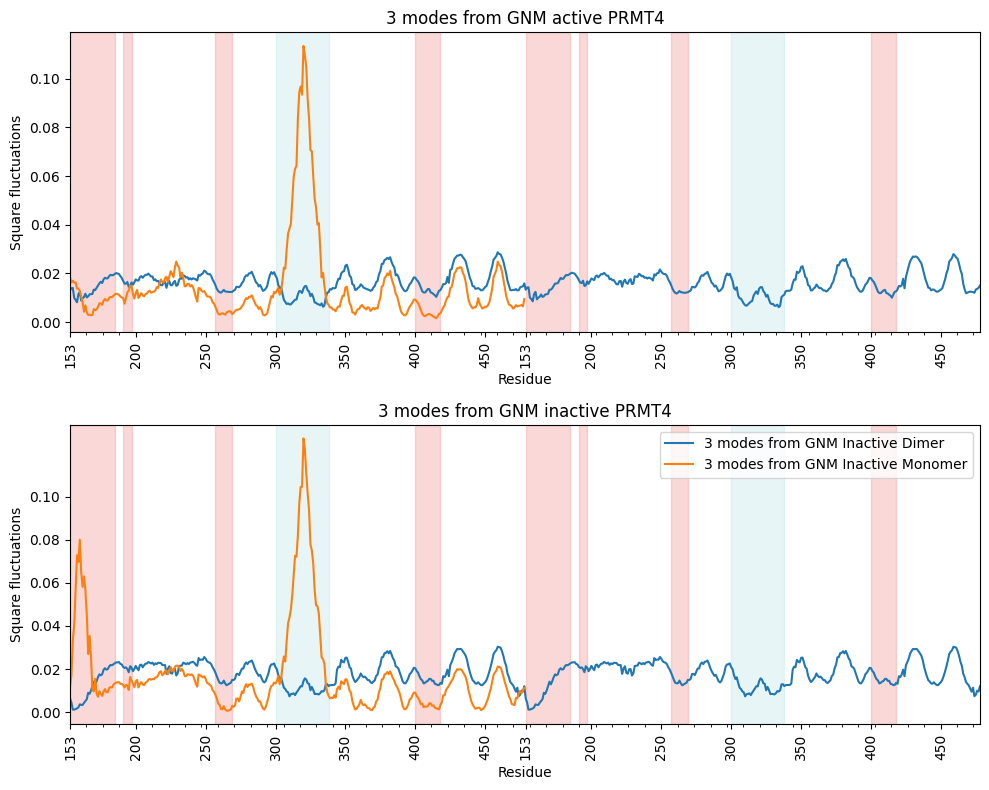

In [89]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'Motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Create vertical subplots: 2 rows, 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# --- Active Dimer Plot (top subplot) ---
plt.sca(ax1)  # Set the current active axis to ax1
showSqFlucts(activeDimer_gnm[:3], activeMonomer_gnm[:3])  # Plot the fluctuation data

# Chain 1 (153 to 478)
chain1_start_index = np.where(resnum_activeDimer == 153)[0][0]
chain1_indices = list(range(chain1_start_index, np.where(resnum_activeDimer == 478)[0][0] + 1))
chain1_labels = resnum_activeDimer[chain1_indices]

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_activeDimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_activeDimer)))
chain2_labels = resnum_activeDimer[chain2_indices]

# Add x-axis ticks and labels for Chain 1 and Chain 2
tick_indices = [chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50] + [chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50]
labels = [chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]) + [chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50])

# Apply highlights for both Chain 1 and Chain 2 in the active plot
for start, end, color, label in highlighted_regions:
    xmin_chain1 = np.where(resnum_activeDimer == start)[0][0]
    xmax_chain1 = np.where(resnum_activeDimer == end)[0][0]
    ax1.axvspan(xmin_chain1, xmax_chain1, color=color, alpha=0.3)
    
    xmin_chain2 = np.where(resnum_activeDimer == start)[0][1]
    xmax_chain2 = np.where(resnum_activeDimer == end)[0][1]
    ax1.axvspan(xmin_chain2, xmax_chain2, color=color, alpha=0.3)

# Set x-axis labels and ticks for active plot
ax1.set_xticks(tick_indices)
ax1.set_xticklabels(labels, rotation=90)
ax1.set_title('3 modes from GNM active PRMT4')

# --- Inactive Dimer Plot (bottom subplot) ---
plt.sca(ax2)  # Set the current active axis to ax2
showSqFlucts(inactiveDimer_gnm[:3], inactiveMonomer_gnm[:3])  # Plot the fluctuation data

# Apply highlights for both Chain 1 and Chain 2 in the inactive plot
for start, end, color, label in highlighted_regions:
    xmin_chain1 = np.where(resnum_activeDimer == start)[0][0]
    xmax_chain1 = np.where(resnum_activeDimer == end)[0][0]
    ax2.axvspan(xmin_chain1, xmax_chain1, color=color, alpha=0.3)
    
    xmin_chain2 = np.where(resnum_activeDimer == start)[0][1]
    xmax_chain2 = np.where(resnum_activeDimer == end)[0][1]
    ax2.axvspan(xmin_chain2, xmax_chain2, color=color, alpha=0.3)

# Set x-axis labels and ticks for inactive plot
ax2.set_xticks(tick_indices)
ax2.set_xticklabels(labels, rotation=90)
ax2.set_title('3 modes from GNM inactive PRMT4')

# Adjust the y-axis ticks to intervals of 0.02 for both subplots
y_ticks = np.arange(0, 0.12, 0.02)
ax1.set_yticks(y_ticks)
ax2.set_yticks(y_ticks)

# Add grid for both subplots
ax1.grid(True)
ax2.grid(True)
ax1.grid()
ax2.grid()
# Adjust layout and show plot
plt.tight_layout()
plt.legend()
plt.show()